<a href="https://colab.research.google.com/github/tbeucler/2023_MLEES_JB/blob/main/ML_EES/Saranya/W4_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Artificial Neural Networks

This chapter summarizes Chapter 10 of "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron which introduces the fundamentals of Artificial Neural Networks (ANNs).

**Learning Objectives**:

1. Define an artificial neural network
2. Understand activation functions
3. Understand the steps & best practices to build an artificial neural network
4. Know the main hyperparameters defining a neural network’s architecture
5. Know the main hyperparameters controlling the training of a neural network

## Understanding Neural Networks:

**Artificial Neural Networks** (ANNs) are computational models inspired by the human brain. They consist of interconnected nodes (neurons) organized in layers. Information flows through these nodes, undergoing weighted computations and transformations, allowing ANNs to learn patterns and relationships from data, used widely in machine learning tasks.

> **Neurons**: Neurons are the basic building blocks of ANNs. They receive inputs, perform computations, and produce outputs.


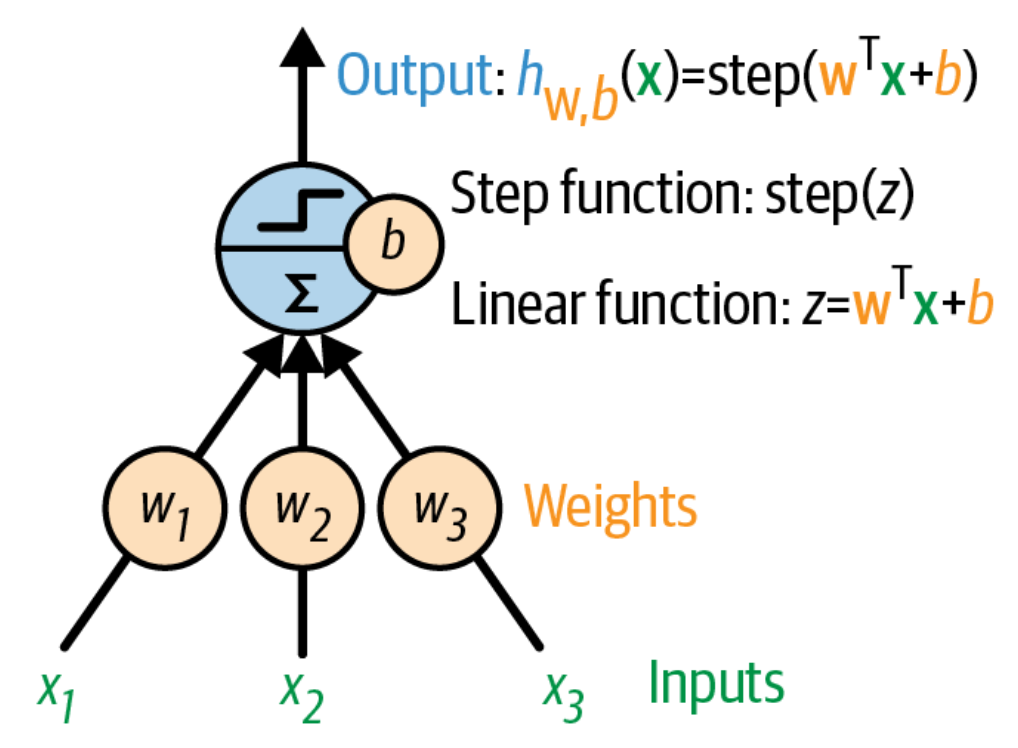

(Géron, 2022)


> **Layers**: ANNs consist of an input layer, one or more hidden layers, and an output layer.


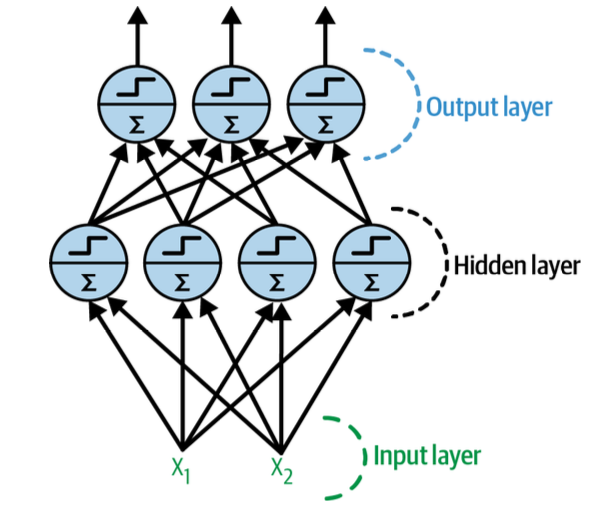

(Géron, 2022)


> **Activation Functions**: Activation functions introduce **non-linearity** to neurons, enabling the network to model complex relationships.

> **Feed-forward Neural Networks** (FNNs): FNNs pass information in one direction, from input to output. They are used for tasks like classification and regression.
>> Example: Building an FNN to classify species based on environmental data.

> **Backpropagation**: Backpropagation is the training algorithm for ANNs. It adjusts the network's weights and biases to minimize the error.
>> Example: Training an ANN to predict air quality based on historical data.

> **Hyperparameter Tuning**: ANNs have numerous hyperparameters that influence their performance, including the number of layers, neurons per layer, and learning rate.
>> Example: Experimenting with different network architectures to optimize accuracy in predicting forest fire occurrences.

> **Overfitting** and **Regularization**: ANNs are susceptible to overfitting, where they memorize training data but perform poorly on new data.
>> Techniques like dropout and early stopping mitigate overfitting.
>> Example: Implementing dropout layers to improve the generalization of an ANN for predicting species distribution.


> **Environmental Applications** 🌄: ANNs are used in environmental sciences for various tasks, such as weather forecasting, climate modeling, and remote sensing image analysis.
>> Example: Using ANNs to predict rainfall patterns based on climate data for flood risk assessment.


## Perceptron
> A **perceptron** is one of the simplest ANN architectures, used for binary classification tasks. In its simplest form, composed of one input layer and one output layer, a perceptron takes multiple binary inputs, applies weights to these inputs, sums them up, adds a bias term, and then passes the result through an activation function (e.g. step function) to produce an output.

Here's a breakdown of the components and the function of a perceptron:
> **Inputs** (X1, X2, X3, ...): These are the features or inputs to the perceptron. Each input is assigned a weight (W1, W2, W3, ...) which determines its importance in the computation.
> **Weights** (W1, W2, W3, ...): Weights are associated with each input and represent the strength of the connection between the input and the perceptron.
>  **Summation** (Σ): The weighted sum of the inputs is calculated as follows:
>> Sum = (X1 * W1) + (X2 * W2) + (X3 * W3) + ...

> **Bias** (B): A bias term is added to the weighted sum. The bias allows the perceptron to shift its decision boundary.
> Sum with Bias = Sum + B      
> **Activation Function** (e.g., Step function): The result of the summation is passed through an activation function. The most common activation function for a perceptron is the step function. If the result is above a certain threshold, the perceptron outputs a "1" (or "True"); otherwise, it outputs a "0" (or "False").
> **Output** = 1 if (Sum with Bias > Threshold), else 0

Here is an environmental science 🌄 example where a perceptron can be used:

>Perceptron for **Species Classification**:
Imagine you're working on a project to identify whether a particular bird species is present in a given area based on environmental features like temperature, humidity, and vegetation density.
You have data on the presence (1) or absence (0) of the bird species in different locations.
>>In this scenario, you can use a perceptron to build a binary classifier. The inputs would be the environmental features (e.g., temperature, humidity, vegetation density), each with its corresponding weight representing its importance in determining bird presence. The perceptron computes the weighted sum of these inputs, adds a bias term, and passes the result through a step function. If the output is 1, it predicts the presence of the bird species; otherwise, it predicts absence.




A single perceptron may have limitations in capturing complex relationships in environmental data, which calls for more complex neural network architectures, such as multi-layer perceptrons (MLPs).

> **Multilayer Perceptron** (MLP)
>> The stack of multiple perceptrons, composed of one input layer, one or more hidden layers, and one final output layer.


## Create a Neural Network
**Building a neural network** in practice involves several steps, from data preparation to model evaluation. Let's go through these steps using an example related to environmental science 🌄: predicting air quality based on meteorological data.

> Step 1: **Data Collection and Preprocessing**
>> Data Collection: Gather historical data containing meteorological variables (e.g., temperature, humidity, wind speed) and corresponding air quality measurements (e.g., PM2.5 levels).      
>> Data Preprocessing: Clean the data by handling missing values, outliers, and scaling features to a similar range (e.g., using Min-Max scaling). Split the data into training and testing sets.

> Step 2: **Model Selection and Architecture**
>> Choose a Neural Network Architecture: Based on the problem, we select an *FNN*. Determine the number of input features (based on meteorological data) and the number of output neurons (1 for air quality prediction).
>> Define the Model: Using a deep learning framework like `Keras`, define the neural network's architecture, including the number of hidden layers and neurons per layer, as well as the activation functions.

For simplicity, let's create a model with one hidden layer.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(1)  # Output layer for air quality prediction
])

> Step 3: **Compilation**
>> Compile the Model: Specify the loss function (e.g., Mean Squared Error for regression tasks), the optimizer (e.g., Adam or SGD), and evaluation metrics (e.g., Mean Absolute Error).
>>> Loss Function: Measures the error between predicted and actual values. Minimizing this error improves model accuracy.</br>
>>> Optimizers: Adjust model weights to reduce the loss calculated by the loss function.</br>
>>> Evaluation Metrics: Assess model performance on training and test data but don't directly influence training.


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

> Step 4: **Training**
>> Train the Model: Use the training data to fit the neural network. Specify the number of epochs (iterations over the entire training dataset) and batch size.
>>> Epoch: A complete pass through the entire training dataset </br>
>>> Batch size: The number of training examples used in one iteration of the model's training process.


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

> Step 5: **Evaluation**
>> Evaluate the Model: Use the testing data to assess the model's performance. Evaluate metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) to measure prediction accuracy.



In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

>  Step 6: **Hyperparameter Tuning**
>> **Hyperparameters defining the network architecture**:
>> 1. **Number of Layers**: Defines the depth of the network.
>> 2. **Number of Neurons per Layer**: Determines the width of each layer.
>> 3. **Activation Functions**: Specifies the functions used to introduce non-linearity.
>> 4. **Architecture-Specific Parameters**: Parameters unique to specific network types.
>> **Hyperparameters controlling the training process**:
>> 1. **Learning Rate**: Governs the step size in updating weights during training.
>> 2. **Batch Size**: Specifies the number of samples processed before updating model parameters.
>> 3. **Optimizer**: Algorithms adjusting weights during training (e.g., SGD, Adam, RMSprop).
>> 4. **Regularization Techniques**: Methods to prevent overfitting (e.g., dropout rates, L1/L2 regularization).
>> 5. **Initialization Schemes**: Initial values for weights and biases.
>> 6. **Early Stopping**: Criterion to stop training based on validation performance.
>> 7. **Training Epochs**: Number of iterations through the entire dataset during training.

>  Step 7: **Deployment**
>> Deploy the Model: Once satisfied with the model's performance, deploy it in a production environment. It can be used to make real-time air quality predictions based on incoming meteorological data.

In this example, we've built a simple neural network for air quality prediction. In practice, you can enhance the model by incorporating more complex architectures (e.g., convolutional neural networks for image-based environmental data) and larger datasets. Neural networks in environmental science can be applied to various tasks, such as predicting pollutants, forecasting weather patterns, or modeling climate phenomena.

**Benefits of Using ANN in Environmental Science**:
* Captures Non-linearity: Pollution levels depend on many complex and non-linear factors, and ANNs are well-suited to capture such relationships.
* Real-Time Predictions: ANNs can process real-time data, allowing for immediate and accurate predictions of pollution levels.
* Integration of Multiple Data Sources: ANNs can handle a wide range of inputs, from meteorological data to traffic and emission sources, making them versatile for environmental modeling.


>> *Tips and Tricks* 💡

*   **How many hidden layers?**

> The choice of the number of hidden layers in a neural network depends on the complexity of the problem you're addressing. You can often *start with a few hidden layers and increase their number as needed*, while more complex tasks may involve *deep networks* or *transfer learning from pretrained models*.
>>**Single Hidden Layer**: For many problems, starting with a single hidden layer can yield reasonable results. Such a network, theoretically, can model even complex functions when it has a sufficient number of neurons. </br>
>> Benefits of **Deep Networks**: In more complex problems, deep neural networks (DNNs) with multiple hidden layers are highly parameter-efficient. They can model complex functions using exponentially fewer neurons than shallow networks. This efficiency enables deep networks to achieve better performance with the same amount of training data. </br>
>> **Hierarchical Learning**: DNNs take advantage of the hierarchical nature of real-world data. Lower layers capture low-level structures (e.g., line segments), intermediate layers combine these to model intermediate-level structures (e.g., shapes), and the highest layers model high-level structures (e.g., faces). This hierarchical architecture aids convergence and generalization. </br>
>> **Transfer Learning**: Deep networks also enable transfer learning. When you want to train a new network for a related task, you can reuse the lower layers of a pre-trained network. This approach accelerates learning by building upon already learned low-level structures. </br>
>> **Network Complexity**: Start with one or two hidden layers for many problems. For instance, you can achieve high accuracy on tasks like MNIST with one or two hidden layers. As problems become more complex, you can increase the number of hidden layers. Very complex tasks, like large image classification or speech recognition, may require networks with many layers. </br>
>> **Pretrained Models**: For very complex tasks, it's common to use pretrained state-of-the-art networks and fine-tune them for the specific problem. This approach significantly speeds up training and requires less data.

*    **How many neurons in the hidden layers?**

> The number of neurons in hidden layers should be chosen based on the specific requirements of your task. Traditional pyramid-style sizing is less common, and *using the same number of neurons in all hidden layers* is often an effective and simpler approach. Consider the dataset and employ techniques to avoid overfitting.       
>> **Input and Output Neurons**: The number of neurons in the input and output layers depends on the specific requirements of your task. For example, the MNIST dataset, with 28x28 pixel images, has 784 input neurons and 10 output neurons for digit classification. </br>
>> **Hidden Layer Sizing**: Traditionally, hidden layers were often structured as a pyramid, with a decreasing number of neurons in each layer. The idea was that low-level features could combine into fewer high-level features. For MNIST, a neural network might have 3 hidden layers, with sizes like 300, 200, and 100. </br>
>> **Simplified Approach**: The practice of designing hidden layers as a pyramid has become less common. Using the same number of neurons in all hidden layers has been found to perform equally well or even better in most cases. This approach simplifies hyperparameter tuning.                      
>> **First Layer Size**: In some cases, it may be beneficial to make the first hidden layer larger than the subsequent layers, depending on the dataset. </br>
>> **Avoiding Overfitting**: You can gradually increase the number of neurons until the network starts overfitting. In practice, it's often simpler to choose a model with more layers and neurons than needed and then use techniques like early stopping and regularization to prevent overfitting. </br>
>> **"Stretch Pants" Approach**: This approach involves starting with a larger model and allowing it to shrink down to the right size during training.

